This project utilizes county-level population, education, poverty, and unemployment data to better understand migration patterns, specifically out-migration patterns, in the United States.  This migration data is from 2017.  

This project is going to be to do initial cleaning and exploration of this data for export into Tableau.

The data used in this project came from county-level data sets from the Department of Agriculture and United States.

These include:
1. Population estimates, including migration patterns. 
2. Poverty estimates, including percent population in poverty.
3. Unemployment, including percent unemployed and median household income.
4. Education, including education attainment by percentage of population.
5. Industry data, the counties primary income source.

Prior to loading this project, there was minor cleaning which occurred for each of the CSVs.  This was limited to the removal of columns which were not relevant to our project.

To start, we are going to load our libraries, and our CSV files.  To view these, we have printed the first from each file with the title of the file displayed above it's corresponding rows.  This gives us a good overall understanding of the data and what steps we might need to take to merge the files.

In [2]:
import pandas
import numpy as np
import matplotlib
import seaborn

files = ['PopulationEstimates.csv', 'PovertyEstimates.csv', 'Unemployment.csv', 'Education.csv', 'Manufacturing.csv']
data = {}

for f in files:
        d = pandas.read_csv('data/{0}'.format(f))
        data[f.replace('.csv', '')] = d

for k,v in data.items():
    print('\n' + k + '\n')
    print(v.head())


PopulationEstimates

   FIPS State       Area_Name  Economic_typology_2015 POP_ESTIMATE_2017  \
0     0    US   United States                     NaN       325,719,178   
1  1000    AL         Alabama                     NaN         4,874,747   
2  1001    AL  Autauga County                     0.0            55,504   
3  1003    AL  Baldwin County                     5.0           212,628   
4  1005    AL  Barbour County                     3.0            25,270   

  Births_2017 Deaths_2017 INTERNATIONAL_MIG_2017 DOMESTIC_MIG_2017  \
0   3,946,000   2,744,040              1,111,283                 0   
1      58,389      52,390                  4,475             3,840   
2         664         510                     15                58   
3       2,325       2,090                    164             4,702   
4         270         286                     -3              -486   

  NET_MIG_2017  
0    1,111,283  
1        8,315  
2           73  
3        4,866  
4         -489  

Pov

Each of these files uses similar columns which we can merge on (state, county, FIPS).  While state names are unique, several states have counties with the same name.  We are now going to create consistency within column names for merging to occur.

FIPS is a federal code for locations and maintains consistency across datasets.

Currently, FIPS is represented as a different name across different datasets, we are going to change the names to all be "FIPS".



In [3]:
data["Education"]["FIPS"] = data["Education"]["FIPS Code"]
data["Unemployment"]["FIPS"] = data["Unemployment"]["FIPStxt"]
data["PovertyEstimates"]["FIPS"] = data["PovertyEstimates"]["FIPStxt"]

Next we are going to merge the data using the FIPS codes provided and then evaluate the shape dataframe to make sure all of the data was appropriately merged.  We are also going to view the column names to see if there are any issues with the columns.

In [4]:
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]
df = flat_data[0]

for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    df = df.merge(f, on="FIPS", how="inner")
    
df.shape

for f in df:
    print(f)

FIPS
State_x
Area_Name_x
Economic_typology_2015
POP_ESTIMATE_2017
Births_2017
Deaths_2017
INTERNATIONAL_MIG_2017
DOMESTIC_MIG_2017
NET_MIG_2017
FIPStxt_x
State_y
Area_Name_y
PCTPOV517_2017
MEDHHINC_2017
FIPStxt_y
State_x
Area_name
Unemployment_rate_2017
FIPS Code
State_y
Area name
2013 Rural-urban Continuum Code
2013 Urban Influence Code
Percent of adults with less than a high school diploma, 2013-17
Percent of adults with a high school diploma only, 2013-17
Percent of adults completing some college or associate's degree, 2013-17
Percent of adults with a bachelor's degree or higher, 2013-17
State
County
metro
econdep
farm
mine
manf
fsgov
serv
nonsp


Following the merging of the datasets, there are quite a few unnecessary columns in this dataframe.  Next, we are going to remove unnecessary columns from the dataframe.

We are also going to view the data types of each of the columns to see if there are any issues with how the data is formated.

In [5]:
df = df.drop(columns=['State_x', 'State_y', 'Area name', 
                      'Area_name', 'Area_Name_x', 'Area_Name_y', 
                      'FIPStxt_x', 'FIPStxt_y', 'FIPS Code'])

df.dtypes

FIPS                                                                          int64
Economic_typology_2015                                                      float64
POP_ESTIMATE_2017                                                            object
Births_2017                                                                  object
Deaths_2017                                                                  object
INTERNATIONAL_MIG_2017                                                       object
DOMESTIC_MIG_2017                                                            object
NET_MIG_2017                                                                 object
PCTPOV517_2017                                                              float64
MEDHHINC_2017                                                                object
Unemployment_rate_2017                                                      float64
2013 Rural-urban Continuum Code                                             

Several of the columns are coming up as strings.  If we take a look at the head, we can determine what is causing this. To get a more accurate picture, we are going to print the top 10 rows.

In [6]:
df.head(10)

,FIPS,Economic_typology_2015,POP_ESTIMATE_2017,Births_2017,Deaths_2017,INTERNATIONAL_MIG_2017,DOMESTIC_MIG_2017,NET_MIG_2017,PCTPOV517_2017,MEDHHINC_2017,...,State,County,metro,econdep,farm,mine,manf,fsgov,serv,nonsp
0,1001,0.0,"55,504",664,510,15,58,73,18.6,"58,343",...,AL,Autauga County,1,3,0,0,1,0,0,0
1,1003,5.0,"212,628","2,325","2,090",164,"4,702","4,866",14.3,"56,607",...,AL,Baldwin County,0,5,0,0,0,0,1,0
2,1005,3.0,"25,270",270,286,-3,-486,-489,48.8,"32,490",...,AL,Barbour County,0,3,0,0,1,0,0,0
3,1007,0.0,"22,668",270,233,20,-20,0,26.8,"45,795",...,AL,Bibb County,1,6,0,0,0,0,0,1
4,1009,0.0,"58,013",685,653,62,359,421,17.7,"48,253",...,AL,Blount County,1,6,0,0,0,0,0,1
5,1011,3.0,"10,309",138,118,18,-170,-152,49.0,"29,113",...,AL,Bullock County,0,1,1,0,0,0,0,0
6,1013,0.0,"19,825",228,253,7,-121,-114,31.8,"36,842",...,AL,Butler County,0,6,0,0,0,0,0,1
7,1015,4.0,"114,728","1,342","1,427",82,-247,-165,22.2,"45,937",...,AL,Calhoun County,1,4,0,0,0,1,0,0
8,1017,0.0,"33,713",384,468,17,65,82,30.1,"36,883",...,AL,Chambers County,0,3,0,0,1,0,0,0
9,1019,0.0,"25,857",244,338,7,178,185,23.3,"44,842",...,AL,Cherokee County,0,6,0,0,0,0,0,1


Two columns are utilizing commas, which are making the data read as strings.  First, we are going to remove those commas.  Next, we are going to take all columns listed as the datatype object which shouldn't be, and convert them to numeric types. We are going to keep state, county, and area name as object.

To make sure these convert correctly, we are going to reevaluate the datatypes of the dataframe.

In [7]:
df['MEDHHINC_2017'] = df['MEDHHINC_2017'].str.replace(",","")
df['POP_ESTIMATE_2017'] = df['POP_ESTIMATE_2017'].str.replace(",","")

cols = ['POP_ESTIMATE_2017', 'Births_2017', 'Deaths_2017', 
        'INTERNATIONAL_MIG_2017', 'DOMESTIC_MIG_2017', 
        'NET_MIG_2017', 'MEDHHINC_2017']

for f in cols:
    df[f] = df[f].apply(pandas.to_numeric, errors='coerce')

df.dtypes

FIPS                                                                          int64
Economic_typology_2015                                                      float64
POP_ESTIMATE_2017                                                             int64
Births_2017                                                                 float64
Deaths_2017                                                                 float64
INTERNATIONAL_MIG_2017                                                      float64
DOMESTIC_MIG_2017                                                           float64
NET_MIG_2017                                                                float64
PCTPOV517_2017                                                              float64
MEDHHINC_2017                                                                 int64
Unemployment_rate_2017                                                      float64
2013 Rural-urban Continuum Code                                             

All of the columns converted to the appropriate data type.  This means we are at a place where we can start exploring this data and the dependent variable:"NET_MIG_2017".

We are going to start with a correlation.  Since this analysis is looking at factors which contribute to out-migration, we are particularly interested in negative correlations.  

In [8]:
df.corr()['NET_MIG_2017']

FIPS                                                                        0.029989
Economic_typology_2015                                                      0.061812
POP_ESTIMATE_2017                                                           0.011303
Births_2017                                                                 0.098079
Deaths_2017                                                                 0.164579
INTERNATIONAL_MIG_2017                                                      0.051105
DOMESTIC_MIG_2017                                                           0.925902
NET_MIG_2017                                                                1.000000
PCTPOV517_2017                                                             -0.207213
MEDHHINC_2017                                                               0.219069
Unemployment_rate_2017                                                     -0.161925
2013 Rural-urban Continuum Code                                  

Based on the correlation the following factors are correlated with out-migration: percent of people in poverty, unemployment rate, higher rural-urban continuum codes, higher urban influence codes, percent of adults with less than a high school diploma, percent of adults with only a high school diploma, farming focused counties, and mining focused counties.

While reliance on federal government for county income is negatively correlated with net migration, this relationship seems to be very weak.

With this information, we are going to evaluate the six independent variables which have the strongest negative correlation with net migration.

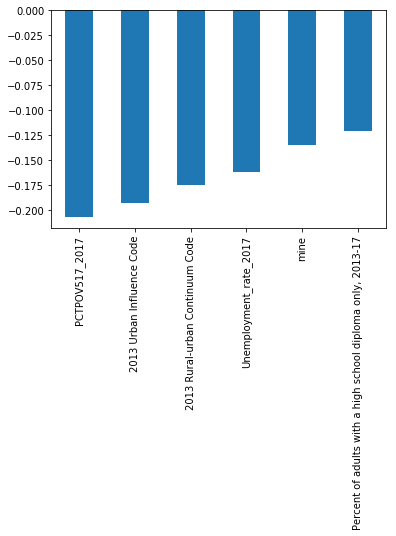

In [11]:
df.corr()['NET_MIG_2017'][['PCTPOV517_2017', '2013 Urban Influence Code', '2013 Rural-urban Continuum Code', 'Unemployment_rate_2017', 'mine', 'Percent of adults with a high school diploma only, 2013-17']].plot.bar()

Immediately, I can see that 2013 Urban Influence Code and 2013 Rural-urban Continuum Code might be correlated and therefore would impact any model I would later try and build. Lets correlated these two to determine if both are necessary to explore.

In [12]:
df.corr()['2013 Urban Influence Code']['2013 Rural-urban Continuum Code']

0.8990520448318131

These two are independent variables are highly correlated.  While there are models which can evaluate the interaction of these variables, for now, it is just something to take note of as we continue our exploration. 

Next, we will evaluate the the variables with the strongest negative corrleation with the dependent variable. We will use scatter plots for continuous variables, and utilize box plots for categorical variables. For each, we will describe what the data has visualized.

We will start with percent of people in poverty.

-0.20721349423006655

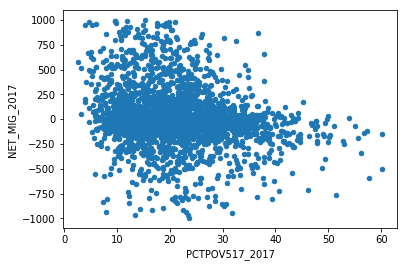

In [415]:
df.plot.scatter(x='PCTPOV517_2017', y='NET_MIG_2017')
df.corr()['PCTPOV517_2017']['NET_MIG_2017']

Percent poverty had the strongest negative correlation (-0.21) with net migration.  It is intuitive to believe out-migration could be caused by poverty in an area.  The scatterplot shows clustering of in-migration below 20% poverty rates, and clustring of outmigration at between 20% and 30% poverty rates.  Counties with more than 40% poverty rates mainly see out-migration with only a few counties showing in-migration.  

Next, we will evaluate the 2013 Urban Influence Code using boxplots.

-0.1928014657322524

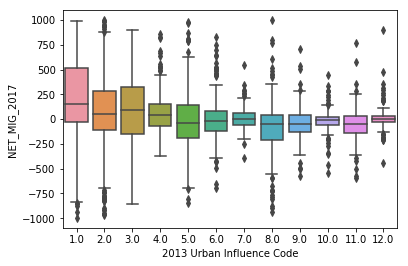

In [416]:
seaborn.boxplot(x='2013 Urban Influence Code', y='NET_MIG_2017', data=df)
df.corr()['2013 Urban Influence Code']['NET_MIG_2017']

Urban Influence Code had the second strongest negative correlation (-0.19) with net migration.  The Urban Influence Code is, "a classification scheme that distinguishes metropolitan counties by population size of their metro area, and nonmetropolitan counties by size of the largest city or town and proximity to metro and micropolitan areas." The higher the number, the more rural the county.  

Interestingly, there are quite a few outliers in this data which will impact future analysis. The trend however remains throughout, everything above code 5 is either near or below equillibrium.

One limitation of this data is time difference.  There are four years between when the Urban Influence Code was documented and when the migration data we are using was collected.

We will now evaluate Rural-Urban Continuum Code.

-0.1745159074195471

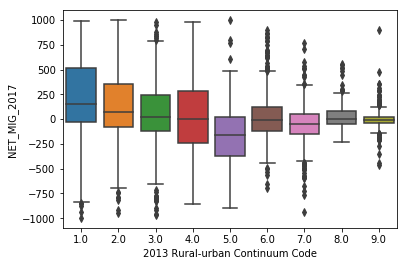

In [14]:
seaborn.boxplot(x='2013 Rural-urban Continuum Code', y='NET_MIG_2017', data=df)
df.corr()['2013 Rural-urban Continuum Code']['NET_MIG_2017']

Similar to the Urban Influence Code, the 2013 Rural-urban Continuum Code is an indicator of proximity to the closest metro area. The higher the code, the more rural the county.

Again, the higher number codes had strong negative correlations (-0.17) with net migration; however, code 5 seems to have the highest levels of out-migration, breaking from the trend.  Similar to the previous box plots, there are several outliers throughout which impact our ability to analyze the data; however, due to the larger sample size, this should be minimal.

It could be interesting to create a band of 1-4 and 5+ to see how this impacts net migration and for later visualization.

Lets see how unemployment rate impacts net migration.

-0.1619248178047599

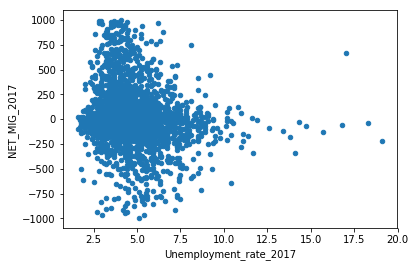

In [15]:
df.plot.scatter(x='Unemployment_rate_2017', y='NET_MIG_2017')
df.corr()['Unemployment_rate_2017']['NET_MIG_2017']

There is some clustering of positive net migration at between 2.5%-5% unemployment and after 5% some clustering of negative net migration.  This is intuitive.  People need income to live, and they need jobs to get income.  After about 10% unemployment rate, with only one excepetion, there is only out-migration present.

This suggests we might want to group unemployment rate into bins of 0%-5%, 5%-10%, and 10%+ when looking to establish clear visualizations.

Next, we are going to look at how mining as the primary economic factor impacts net migration.

-0.13452118466719137

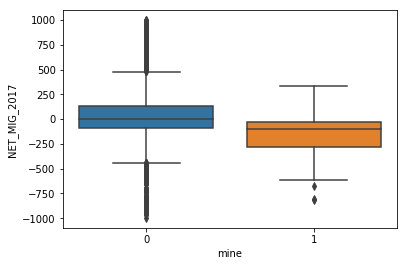

In [420]:
seaborn.boxplot(x=df['mine'], y=df['NET_MIG_2017'])
df.corr()['mine']['NET_MIG_2017']

More than 75% of counties where mining is the primary economic factor have out-migration occurring; however, there are many outliers, especially within the counties which do not rely on mining.  These outliers will have an impact on analyses like the correlation (-0.13).  Similar to the previous analysis, it would be interesting to see how mining counties correlate with unemployment.  

In [421]:
df.corr()['mine']['Unemployment_rate_2017']

0.1563699732055243

Mining-based economy is positively correlated with unemployment rate.  This suggests jobs might be dwindling in these communities, causing people to move away.  Again, this could lend to additional analyses which could help better understand how these variables impact outmigration.

Last, we are going to evaluate how education impacts migration rates.

-0.16159025874972588

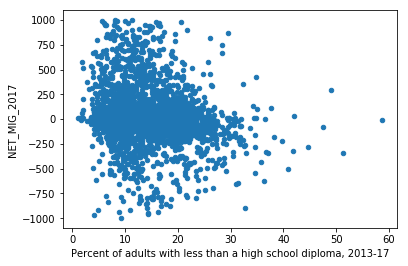

In [13]:
df.plot.scatter(x='Percent of adults with less than a high school diploma, 2013-17', y='NET_MIG_2017')
df.corr()['Percent of adults with less than a high school diploma, 2013-17']['NET_MIG_2017']

Lack of education of the overall population has a negative correlation (-0.16) with net migration.  There seems to be a clustering of postivie migration in counties where 20% or less do not have a high school diploma, and a similar clustering for negative migration for 10% or more.  

It would be interesting to take a look at how this variable correlates with poverty rate.

In [ ]:
df.corr()['Percent of adults with less than a high school diploma, 2013-17']['PCTPOV517_2017']

As seen above, the correlation with poverty rate is very high (0.68).  This could show the interaction of both of then independent variables on the dependent variable, and could suggest some analyses to run in the future (example: a path analysis).

The last thing we are going to do is export the dataframe into a file which can be used by our data visualization tool, in this case Tableau.

In [422]:
df.to_excel("output.xlsx")